# Анализ датасета `train.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

df = pd.read_csv("data/train.csv")
df.shape

(188533, 13)

## Обзор

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,188533.0,NaN,NaN,NaN,94266.0,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
brand,188533,57,Ford,23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,188533,1897,F-150 XLT,2945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,188533.0,NaN,NaN,NaN,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,NaN,NaN,NaN,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
fuel_type,183450,7,Gasoline,165940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,188533,1117,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,188533,52,A/T,49904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,188533,319,Black,48658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,188533,156,Black,107674,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Пропуски, дубликаты, уникальные значения

In [4]:
df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

Есть пропуски в fuel_type, accident, clean_title. recyclable_package, low_fat, coffee_bar, video_store, salad_bar, prepared_food, florist - бинарные.
total_children, num_children_at_home и avg_cars_at home(approx).1 - похожи на дискретные

## Визуализация: распределения признаков

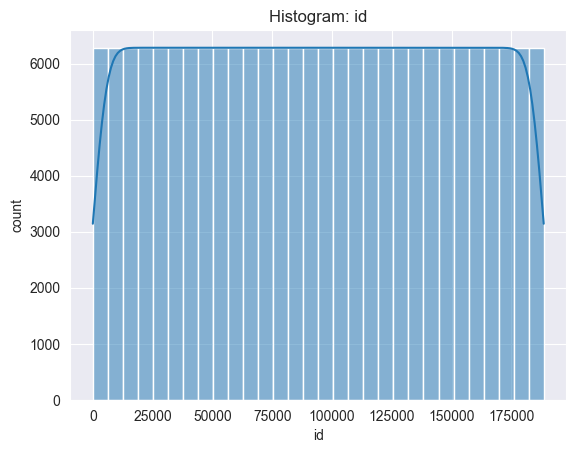

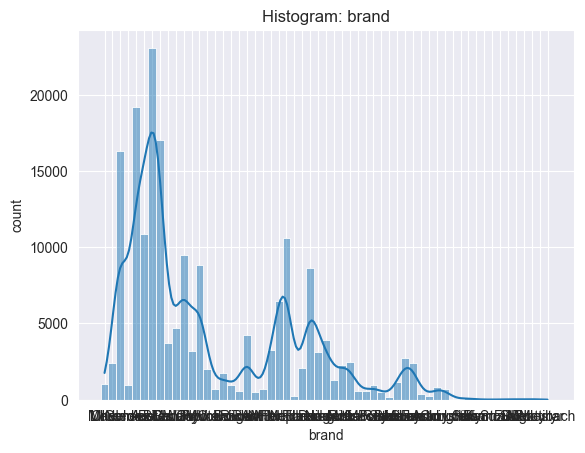

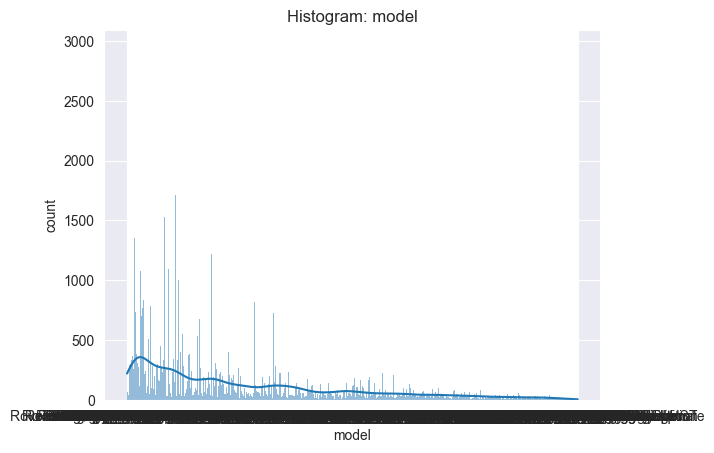

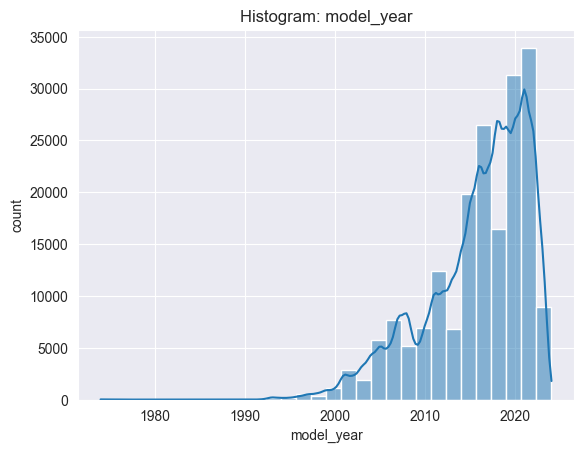

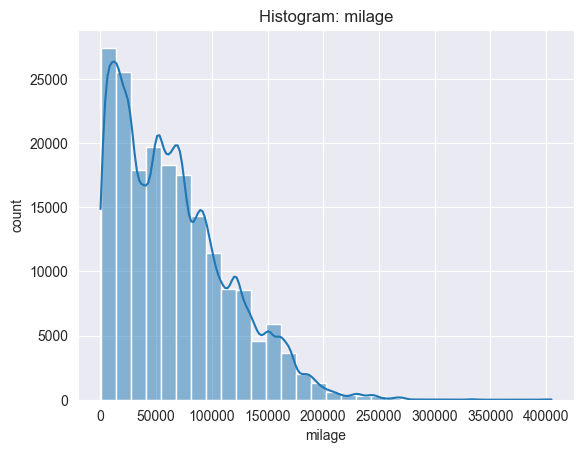

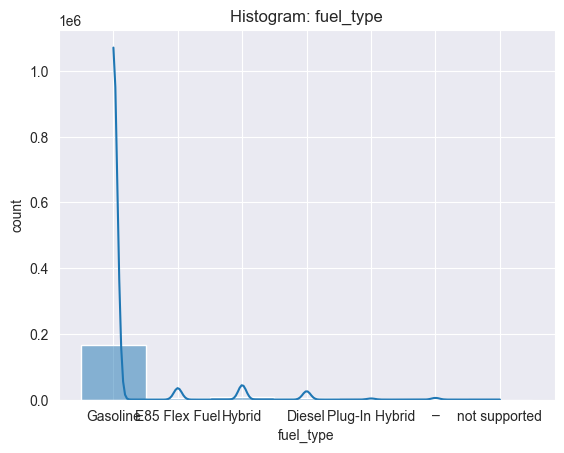

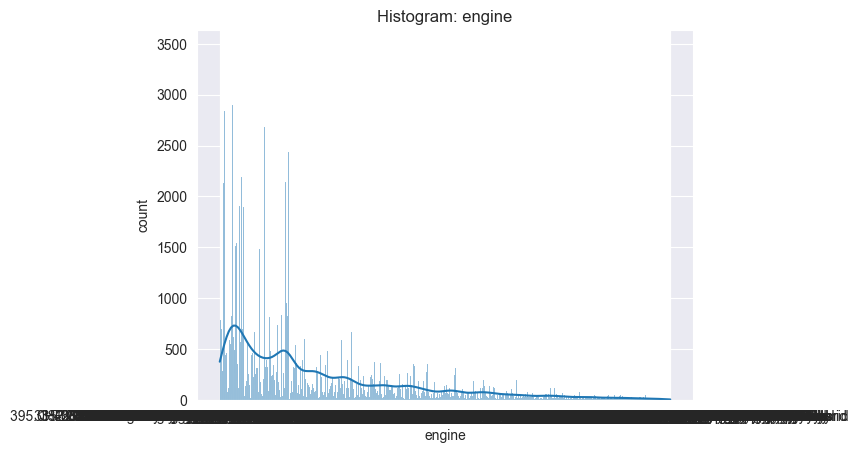

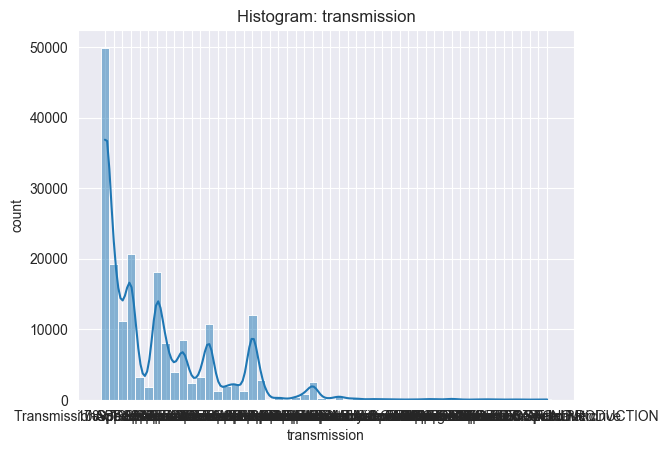

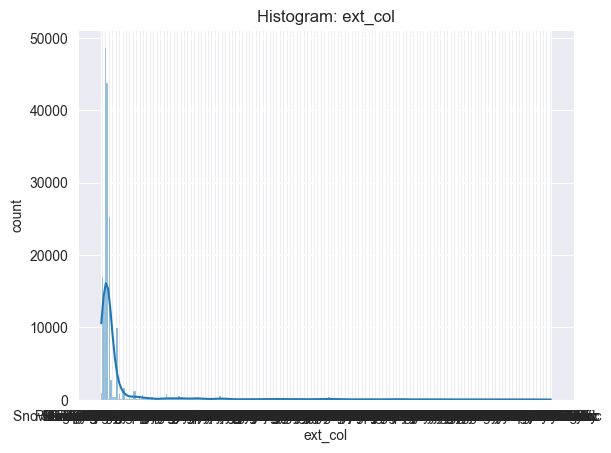

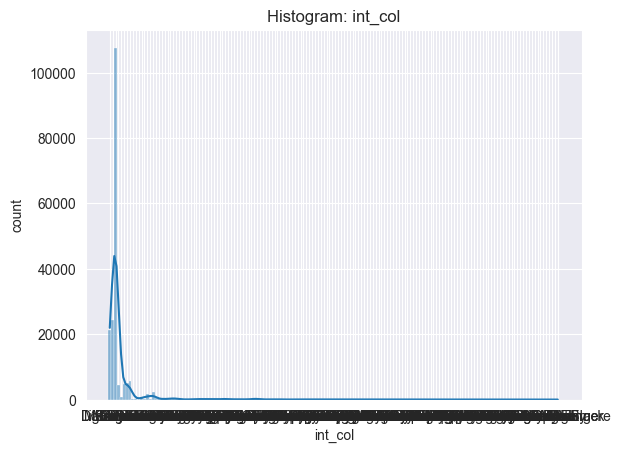

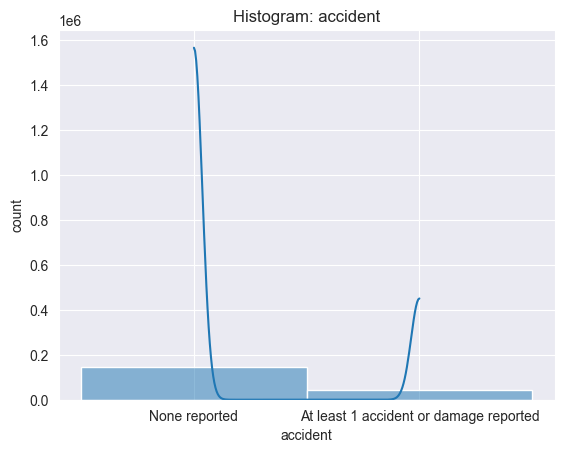

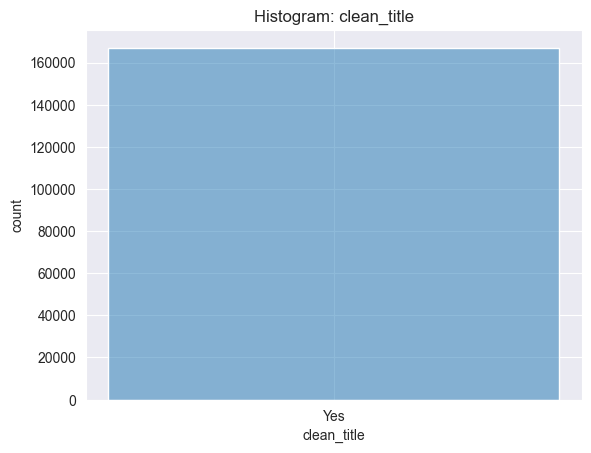

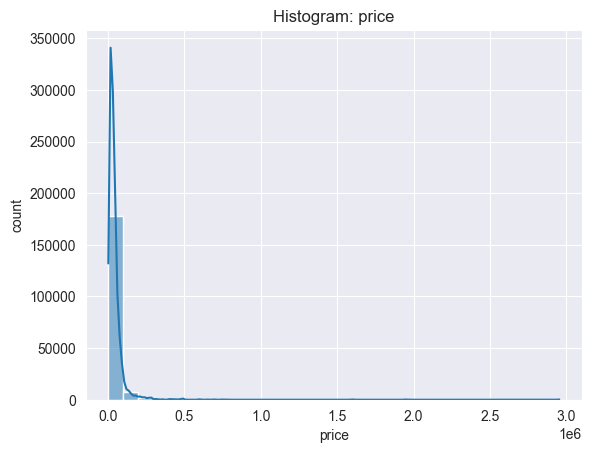

In [7]:
for c in df.columns:
    plt.figure()
    sns.histplot(df[c], bins=30, kde=True)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

## Корреляции

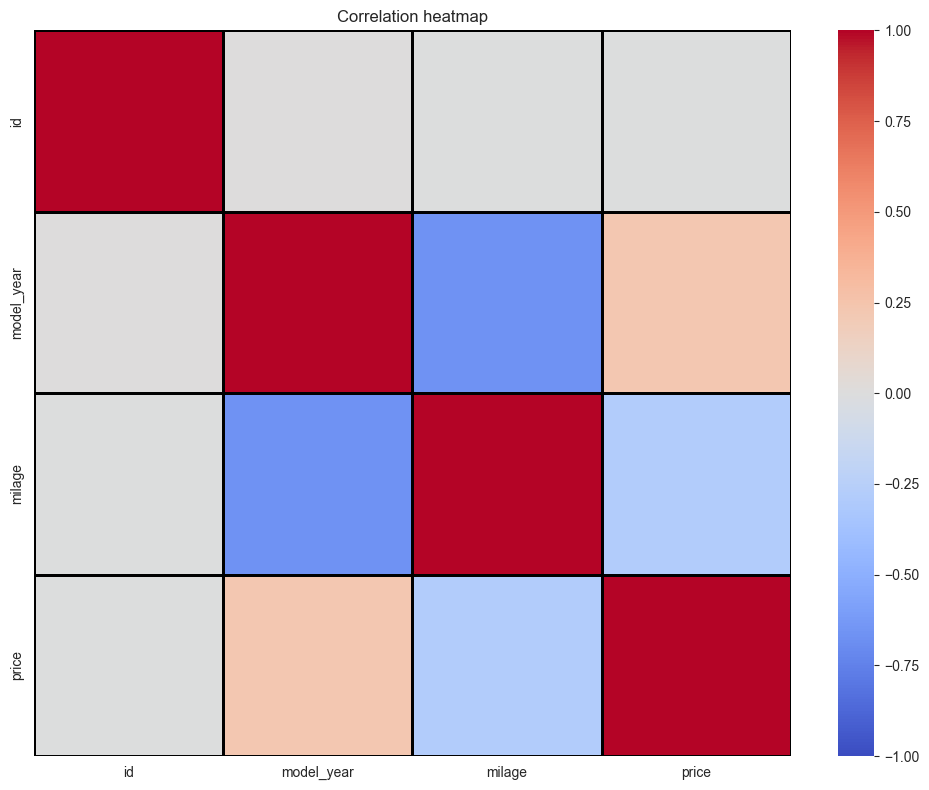

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

## Pairplot

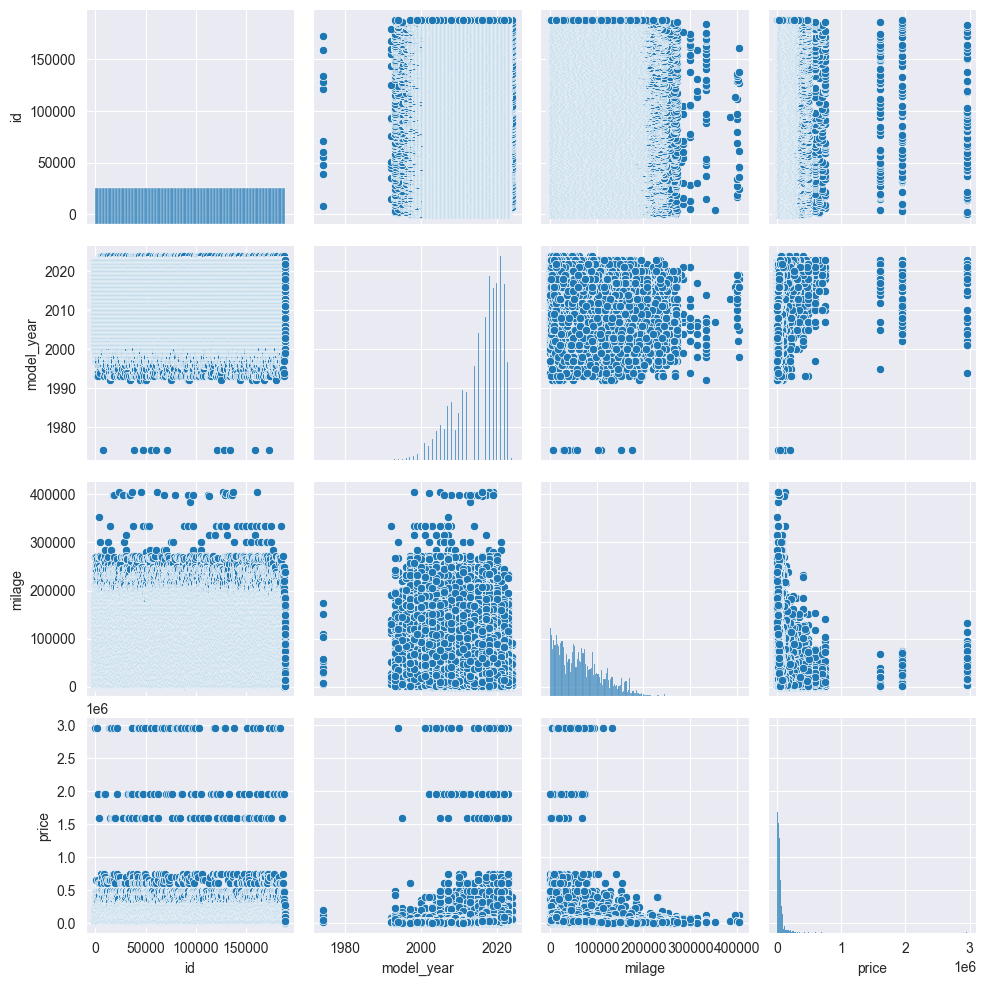

In [9]:
sns.pairplot(df)